---
# 3.3 Fixed point iteration
---

Another simple approach to solving 

$$f(x) = 0$$

is to re-write it as

$$x = g(x)$$

for some continuous function $g$. We call a point $x$ a **fixed-point** of $g$ if $x = g(x)$.

---

### Example

If we let 
$$g(x) = x - f(x),$$ 
then
$$x = g(x) \quad \Rightarrow \quad x = x - f(x) \quad \Rightarrow \quad f(x) = 0.$$

Let's plot these functions using $f(x) = x^2 - 2.$

In [1]:
using Plots, LaTeXStrings

In [2]:
f(x) = x^2 - 2
g(x) = x - f(x)

g (generic function with 1 method)

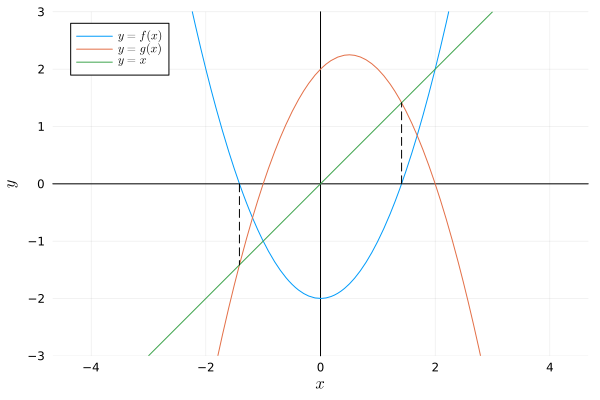

In [3]:
a, b = -3.0, 3.0

plot(axes_style=:zerolines, aspect_ratio=:equal, legend=:topleft, ylims=[-3,3])
plot!(f, a, b, label=L"y = f(x)", c=1)
plot!(g, a, b, label=L"y = g(x)", c=2)
plot!(x -> x, a, b, label=L"y = x", c=3)
plot!([-sqrt(2), -sqrt(2)], [0, -sqrt(2)], linestyles=:dash, color=:black, label=:none)
plot!([sqrt(2), sqrt(2)], [0, sqrt(2)], linestyles=:dash, color=:black, label=:none)
xlabel!(L"x"); ylabel!(L"y")

---

### Choices of $g$

There are many possible choices for $g$:

- $g(x) = x - f(x)$
- $g(x) = x + cf(x)$, for some nonzero constant $c$
- $g(x) = x - f(x)\big/f'(x)$

Some choices for $g$ will be better than others.

---

## Fixed point iteration

Given some initial guess $x_0$, we can use the function $g$ to generate a sequence of iterates as follows:

$$x_{k+1} = g(x_{k}), \qquad k = 0, 1, 2, \ldots.$$

If the sequence $\{x_k\}$ converges to some point $x^*$, then we must have $x^* = g(x^*)$, so $f(x^*) = 0$.

---

In [4]:
function fixedPointPlot(g, a, b, x0; num=5, usequiver=true)

    plt = plot(g, a, b, label=L"y = g(x)", color=:blue)
    plot!(x -> x, a, b, label=L"y = x", color=:green)
    
    x = x0
    for i = 1:num
        if usequiver
            quiver!([x, x], [x, g(x)],
                quiver=([0, g(x)-x], [g(x)-x, 0]))
        else
            plot!([x, x], [x, g(x)], color=i, label=:none)
            plot!([x, g(x)], [g(x), g(x)], color=i, label=:none)
        end
        x = g(x)
    end
    
    scatter!([x0], [x0], label=:none, color=:lime)
    scatter!([x], [x], label=:none, color=:red)
    
    xlabel!(L"x")
    ylabel!(L"y")
    plot!(legend=:outertopright)
    title!("Fixed-point iteration")
    
    return plt
end

fixedPointPlot (generic function with 1 method)

### Example (continued)

Let's try $f(x) = x^2 - 2$ and $g(x) = x - f(x)$.

In [5]:
g1(x) = x - f(x)

g1 (generic function with 1 method)

In [8]:
using Printf

x0 = 1.2

x = x0
@printf("%4s %12s\n", "k", "xk")
for k = 1:20
    x = g1(x)
    @printf("%4d %12.4e\n", k, x)
end

   k           xk
   1   1.7600e+00
   2   6.6240e-01
   3   2.2236e+00
   4  -7.2089e-01
   5   7.5943e-01
   6   2.1827e+00
   7  -5.8146e-01
   8   1.0804e+00
   9   1.9131e+00
  10   2.5320e-01
  11   2.1891e+00
  12  -6.0302e-01
  13   1.0333e+00
  14   1.9655e+00
  15   1.0219e-01
  16   2.0917e+00
  17  -2.8365e-01
  18   1.6359e+00
  19   9.5975e-01
  20   2.0386e+00


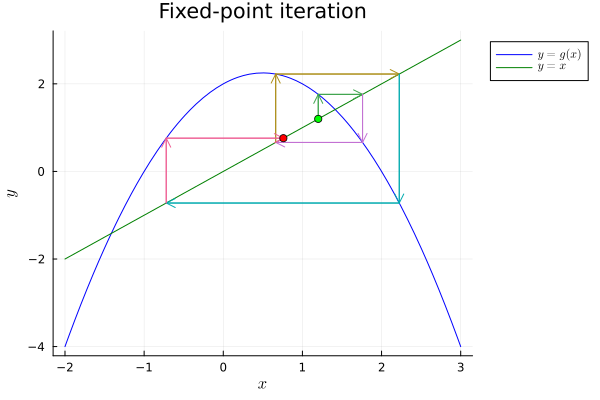

In [12]:
fixedPointPlot(g1, -2, 3, x0, num=5)

It does not seem to be converging to anything.

Now let's try $g(x) = x - f(x)\big/f'(x)$.

In [14]:
fp(x) = 2x

g2(x) = x - f(x)/fp(x)

g2 (generic function with 1 method)

In [15]:
x = 1.1
xs = sqrt(2)


@printf("%4s %12s\n", "k", "error")
for k = 1:5
    x = g2(x)
    @printf("%4d %12.4e\n", k, x - xs)
end

   k        error
   1   4.4877e-02
   2   6.9015e-04
   3   1.6832e-07
   4   9.9920e-15
   5   0.0000e+00


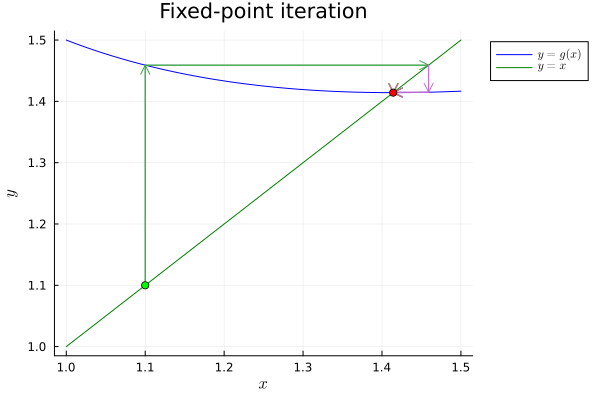

In [16]:
fixedPointPlot(g2, 1.0, 1.5, 1.1, usequiver=true)

It converges very rapidly! We will see why this is happening.

Now let's try $g(x) = x - \cos(x) f(x)$.

In [17]:
g3(x) = x - cos(x)*f(x)

g3 (generic function with 1 method)

In [20]:
x = 1.5
xs = sqrt(2)

@printf("%4s %12s\n", "k", "error")
for k = 1:20
    x = g3(x)
    @printf("%4d %12.4e\n", k, x - xs)
end

   k        error
   1   6.8102e-02
   2   5.0671e-02
   3   3.5249e-02
   4   2.3031e-02
   5   1.4287e-02
   6   8.5271e-03
   7   4.9586e-03
   8   2.8365e-03
   9   1.6066e-03
  10   9.0479e-04
  11   5.0787e-04
  12   2.8454e-04
  13   1.5925e-04
  14   8.9077e-05
  15   4.9808e-05
  16   2.7845e-05
  17   1.5566e-05
  18   8.7006e-06
  19   4.8632e-06
  20   2.7182e-06


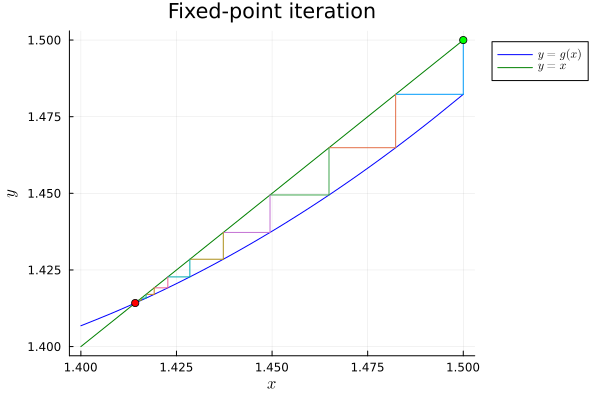

In [23]:
fixedPointPlot(g3, 1.4, 1.5, 1.5, num=60, usequiver=false)

This fixed point iteration converges, but very slowly.

---

## Existence and uniqueness of a fixed point

A fixed point may not exist in $[a,b]$, and if it does, it may not be unique.


> ### Fixed Point Theorem
> Let $g \in C[a,b]$ such that one of the two following conditions hold:
> 1. $g(a) \geq a$ and $g(b) \leq b$;
> 2. $g(a) \leq a$ and $g(b) \geq b$.
>
> Then $\exists x^* \in [a,b]$ such that $g(x^*) = x^*$.
>
> In addition, if $g$ is differentiable on the open interval $(a,b)$ and 
>
> $$\left|g'(x)\right| \leq \rho, \quad \forall x \in (a,b),$$
>
> for some $\rho < 1$, then $x^*$ is the *unique* fixed point in $[a,b]$.

To prove the fixed point theorem, we will use the following:

> ## Mean Value Theorem
>
> If $f \in C[a,b]$ and $f$ is differentiable on the open interval $(a,b)$, then there exists a number $c \in (a,b)$ such that 
>
> $$f'(c) = \frac{f(b)-f(a)}{b-a}.$$

### Proof of the Fixed Point Theorem:

Suppose $g(a) \geq a$ and $g(b) \leq b$. If $g(a) = a$ or $g(b) = b$, then we are done. Otherwise we have $g(a) > a$ and $g(b) < b$.
Let

$$\phi(x) = g(x) - x.$$

Then $\phi(a) > 0$ and $\phi(b) < 0$. Thus, since $\phi$ is continuous, the **Intermediate Value Theorem** tells us that there is an $x^* \in [a,b]$ such that $\phi(x^*) = 0$. Thus $x^* = g(x^*)$.

The other case of $g(a) \leq a$ and $g(b) \geq b$ can be proven similarly.

Now suppose $g$ is differentiable and there is a $\rho < 1$ such that $\left|g'(x)\right| \leq \rho$ for all $x \in (a,b)$. Suppose, **for the sake of contradiciton**, that $x^*$ is not the only fixed point of $g$ in $[a,b]$. Then, there is a $y^* \in [a,b]$ such that $g(y^*) = y^*$ and $y^* \neq x^*$. 

By the **Mean Value Theorem**, there is a $\xi$ strictly between $x^*$ and $y^*$ such that

$$  g'(\xi) = \frac{g(x^*) - g(y^*)}{x^* - y^*} = \frac{x^* - y^*}{x^* - y^*} = 1.$$

Note that $\xi \in (a,b)$. This contradicts our assumption that $\left|g'(x)\right| \leq \rho < 1$, for all $x \in (a,b)$. Therefore, the fixed point of $g$ in $[a,b]$ must be unique. $\blacksquare$

---

## Convergence

We have seen that the fixed point iteration does not always converge. 

> ### Theorem: (Convergence of the Fixed Point Iteration)
>
> Let $g \in C[a,b]$. If 
> - $a \leq g(x) \leq b$, for all $x \in [a,b]$, and
> - there is a $\rho < 1$ such that $\left|g'(x)\right| \leq \rho$ for all $x \in (a,b),$
>
> then the iteration 
>
> $$x_{k+1} = g(x_{k}), \qquad k = 0, 1, 2, \ldots$$
>
> converges to the unique fixed point $x^* \in [a,b]$ starting from any $x_0 \in [a,b]$.

### Proof:

First of all, since $g(x) \in [a,b]$ for all $x \in [a,b]$, and since $x_0 \in [a,b]$, we have $x_k \in [a,b]$, for all $k = 0, 1, 2, \ldots$. Moreover, by the **Fixed Point Theorem**, our assumptions imply that there is a unique fixed point $x^* \in [a,b]$. 

Let $k \in \{1,2,\ldots\}$. If $x_{k-1} = x^*$, then we have already converged to the fixed point. Otherwise, suppose that $x_{k-1} \neq x^*$. By the **Taylor Series Theorem** (could also use the **Mean Value Theorem** like above), there exists a $\xi$ strictly between $x_{k-1}$ and $x^*$ such that 

$$ g(x_{k-1}) = g(x^* + (x_{k-1} - x^*)) = g(x^*) + g'(\xi) (x_{k-1} - x^*).$$

Note that $\xi \in (a,b)$. Thus,

$$ \left|x_k - x^*\right| = \left|g(x_{k-1}) - g(x^*)\right| = \left|g'(\xi)(x_{k-1} - x^*)\right| = \left|g'(\xi)\right|\left|x_{k-1} - x^*\right| \leq \rho \left|x_{k-1} - x^*\right|. $$

So $\left|x_k - x^*\right| \leq \rho \left|x_{k-1} - x^*\right|$ for $k = 1, 2, \ldots$, which implies that

$$ 0 \le \left|x_k - x^*\right| \leq \rho \left|x_{k-1} - x^*\right| \leq \rho^2 \left|x_{k-2} - x^*\right| \leq \cdots \leq \rho^k \left|x_{0} - x^*\right|.$$

Since $\rho < 1$, the right-hand-side converges to $0$ as $k \to \infty$. Therefore,

$$ \lim_{k \to \infty} \left|x_k - x^*\right| = 0,$$

so $x_k$ converges to $x^*$. $\blacksquare$

### Notes:

- $\rho$ is called the **contraction factor**.
- The smaller $\rho$ is, the faster the convergence will be.

---

## Example

The first $g$ we considered was

$$g(x) = x - x^2 + 2$$

which has the fixed points $x_1^* = -\sqrt{2}$ and $x_2^* = \sqrt{2}$. Note that

$$g'(x) = 1 - 2x$$

and that 

$$\begin{align}
g'(x_1^*) & = 1 + 2\sqrt{2} = 3.8284271247461903\ldots, \\
g'(x_2^*) & = 1 - 2\sqrt{2} = -1.8284271247461903\ldots. \\
\end{align}
$$

So, $\left|g'(x_i^*)\right| > 1$ for $i=1,2$, which explains why the fixed point iteration would not converge to either fixed point.

---

## Example

The second $g$ we considered was

$$g(x) = x - \frac{x^2 - 2}{2x} = \frac{x}{2} + \frac{1}{x},$$

which has the fixed points $x_1^* = -\sqrt{2}$ and $x_2^* = \sqrt{2}$. Now the derivative is

$$g'(x) = \frac{1}{2} - \frac{1}{x^2},$$

and so

$$g'(x_i^*) = 0, \quad i=1,2.$$

Thus, for $i=1,2$, we have $\left|g'(x_i^*)\right| < \rho$, for any $\rho \in (0,1)$. This explains why the fixed point iteration converged rapidly to $x_2^*$ from $x_0 = 1.1$; we also expect rapid convergence to $x_1^*$ from suitable $x_0$.

---

## Example

We also considered

$$ g(x) = x - \cos(x)(x^2 - 2),$$

which has the fixed points $x_1^* = -\sqrt{2}$ and $x_2^* = \sqrt{2}$. The derivative is

$$ g'(x) = 1 + \sin(x)(x^2-2) - 2x\cos(x). $$

In [ ]:
gp(x) = 1 + sin(x)*(x^2 - 2) - 2x*cos(x)

In [ ]:
gp(sqrt(2))

In [ ]:
gp(-sqrt(2))

Thus, we expect the fixed point iteration to converge to $x_2^*$ from a suitable $x_0$ at a rate of $\rho \approx 0.5589$. However, no fixed point iteration will converge to $x_1^*$.

---